In [ ]:
import os
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [ ]:
! pip install -U imbalanced-learn

In [ ]:
seed = 42
np.random.seed(seed)

In [ ]:
path = kagglehub.dataset_download("zeeshier/weather-forecast-dataset")

print("Path to dataset files:", path)

files = os.listdir(path)
print("Files in dataset folder:", files)

csv_file = [f for f in files if f.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)
print("csv_path", csv_path)

Path to dataset files: /root/.cache/kagglehub/datasets/zeeshier/weather-forecast-dataset/versions/1
Files in dataset folder: ['weather_forecast_data.csv']
csv_path /root/.cache/kagglehub/datasets/zeeshier/weather-forecast-dataset/versions/1/weather_forecast_data.csv


In [ ]:
my_dataframe = pd.read_csv(csv_path)
my_dataframe.head(10)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
5,26.147353,48.217260,15.258547,59.766279,1049.738751,no rain
6,20.939680,40.799444,2.232566,45.827508,1014.173766,no rain
7,32.294325,51.848471,2.873621,92.551497,1006.041733,no rain
8,34.091569,48.057114,5.570206,82.524873,993.732047,no rain
9,19.586038,82.978293,5.760537,98.014450,1036.503457,rain


In [ ]:
my_dataframe['Rain']

,Rain
0,rain
1,no rain
2,no rain
3,rain
4,no rain
...,...
2495,no rain
2496,no rain
2497,no rain
2498,no rain


In [ ]:
n = len(pd.unique(my_dataframe['Rain']))
unique_values = my_dataframe['Rain'].unique()

print(n)
print(unique_values)

2
['rain' 'no rain']


In [ ]:
our_rain_mapping = {
    'no rain': 0,
    'rain': 1
}

In [ ]:
my_dataframe['Rain'] = my_dataframe['Rain'].map(our_rain_mapping)
my_dataframe['Rain']

,Rain
0,1
1,0
2,0
3,1
4,0
...,...
2495,0
2496,0
2497,0
2498,0


In [ ]:
my_dataframe.info()
my_dataframe.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 117.3 KB


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0
5,26.147353,48.217260,15.258547,59.766279,1049.738751,0
6,20.939680,40.799444,2.232566,45.827508,1014.173766,0
7,32.294325,51.848471,2.873621,92.551497,1006.041733,0
8,34.091569,48.057114,5.570206,82.524873,993.732047,0
9,19.586038,82.978293,5.760537,98.014450,1036.503457,1


In [ ]:
my_dataframe.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336,0.125600
std,7.326996,19.954739,5.780316,29.123104,20.196433,0.331464
min,10.001842,30.005071,0.009819,0.015038,980.014486,0.000000
25%,16.359398,47.339815,4.761909,23.900016,996.938630,0.000000
50%,22.536448,63.920797,9.908572,49.488284,1013.433035,0.000000
75%,28.976476,81.561021,14.948408,75.324140,1031.735067,0.000000
max,34.995214,99.997481,19.999132,99.997795,1049.985593,1.000000


In [ ]:
feature_columns = ['Temperature', 'Humidity']
label_column = ['Rain']

# Extract features and label
features = my_dataframe[feature_columns]
labels = my_dataframe[label_column]

<Axes: ylabel='count'>

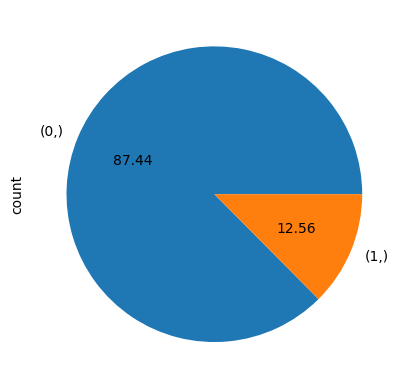

In [ ]:
# Show pie plot (Approach 1)
labels.value_counts().plot.pie(autopct='%.2f')

In [ ]:
labels.value_counts()

,count
Rain,
0,2186
1,314


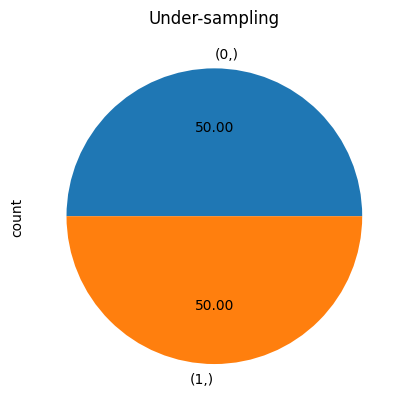

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(features, labels)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
y_res.value_counts()

,count
Rain,
0,314
1,314
